# TASK A: Building a Binary Classifier by Implementing SVM

## Importing the necessary libraries for the task

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skimage.feature import hog
import time
import matplotlib.pyplot as plt
import data_acquisition as da

Using TensorFlow backend.


# Initial SVM 

## Getting the Training and Validation Data

In [5]:
# Importing the data through the data_acquisition file
xdat, ydat = da.labels_binary('./dataset')
x = np.array(xdat)
y = np.array(ydat)

# Vectorizing the features
x = np.reshape(x, (3000, (512*512)))

# Normalizing the features
x = x/255.

print(x.shape)

(3000, 262144)


In [6]:
# Splitting the dataset into training and validation set (85% training and 15% validation set)
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.85, random_state=15) 

## Implementing SVM Algorithm from the Scikit Library

In [7]:
svc_classifier1 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used

# Fitting our training data onto the classifier while also finding the runtime
start_time = time.time()
svc_classifier1.fit(xtrain, ytrain)
classifier1_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier1_time))

Training time is: 196.45916366577148 seconds


In [8]:
# Predicting the outputs using SVM
y_pred_val1 = svc_classifier1.predict(xval)
y_pred_train1 = svc_classifier1.predict(xtrain)

## Evaluating the Model Using the Validation Set

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9444444444444444
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.80      0.82      0.81        65
       tumor       0.97      0.97      0.97       385

    accuracy                           0.94       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.94      0.94      0.94       450

The confusion matrix: 


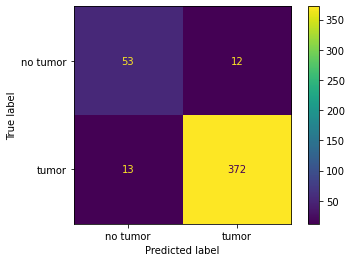

In [9]:
# Producing an accuracy score
print('The accuracy of the train set: ')
print(accuracy_score(ytrain, y_pred_train1))
print('The accuracy of the validation set: ')
print(accuracy_score(yval, y_pred_val1))

# Creating a classification report
print('The classification report: ')
print(classification_report(yval, y_pred_val1, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat1 = confusion_matrix(yval, y_pred_val1, labels=svc_classifier1.classes_)
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()

# SVM with Histogram of Oriented Gradients (HOG)

## Getting the Training and Validation Data

In [10]:
# Importing the data through the data_acquisition file
xdat, ydat = da.labels_binary('./dataset')
x = np.array(xdat)
y = np.array(ydat)

print(x.shape)

(3000, 512, 512, 1)


## Implementing HOG for Extracting Features from Image Data

In [11]:
# Creating lists for storing the HOG feature vectors and HOG images for each image  
hog_features = []
hog_images = []

# Looping over the images and using hog() function from scikit-image library  
for datum in range(x.shape[0]):
    feature, hog_image = hog(x[datum], orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
    hog_features.append(feature)
    hog_images.append(hog_image)

In [12]:
# Converting the HOG features into an array
hog_features = np.array(hog_features)
hog_features.shape

(3000, 8192)

Text(0.5, 1.0, 'Image Before Using HOG')

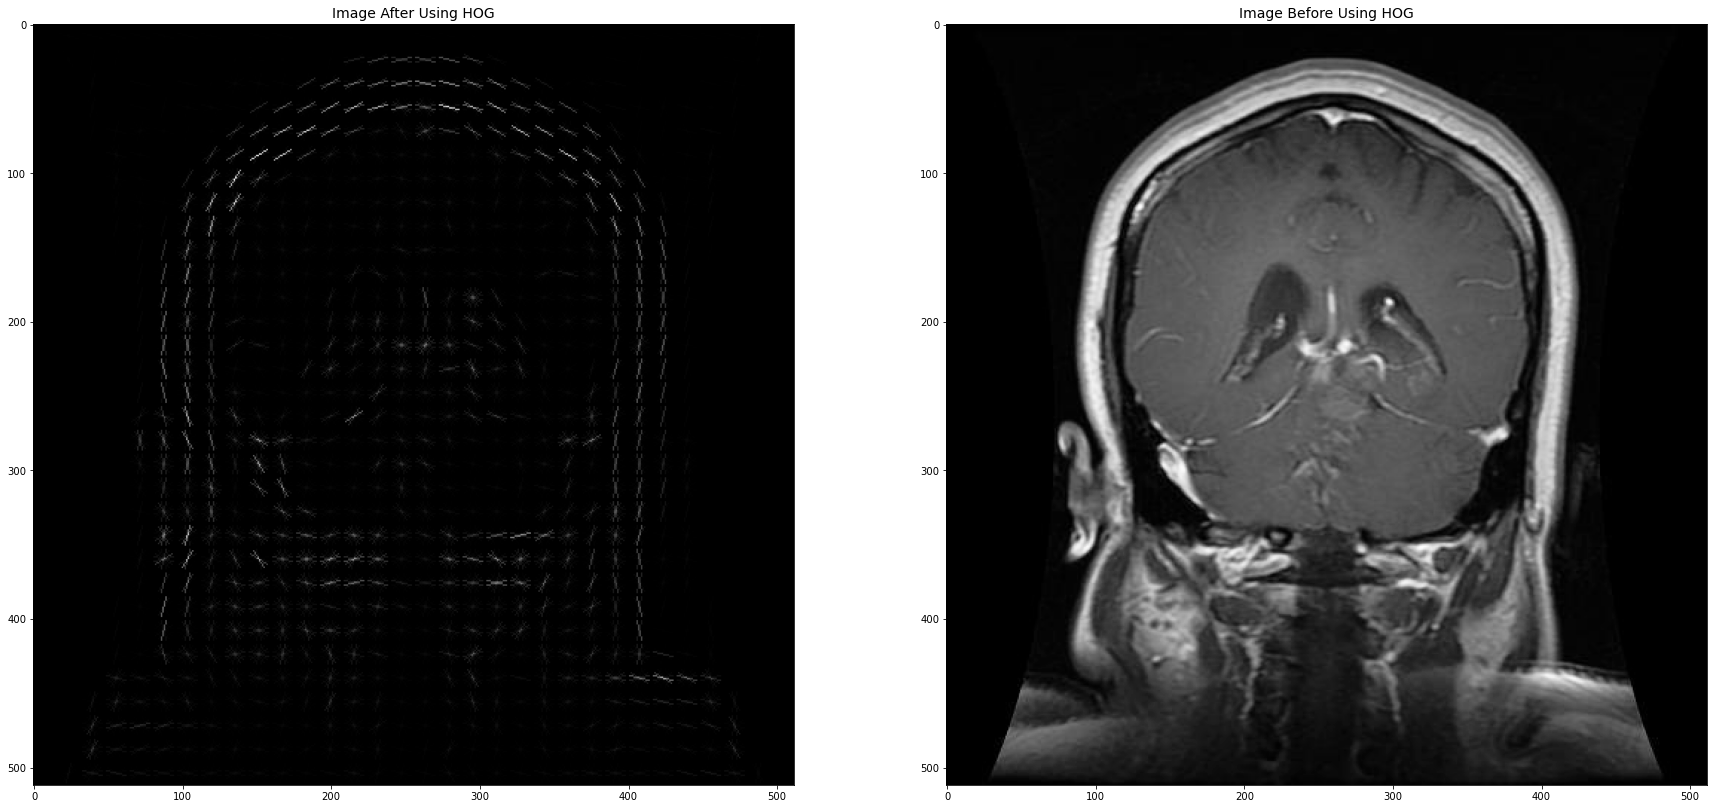

In [13]:
# Plotting the image[1500] from the training set after using the hog() function and before using the hog() function 
fig1, ax1 = plt.subplots(1,2, figsize=(30,30))
ax1[0].imshow(hog_images[1500], cmap=plt.cm.gray)
ax1[0].set_title('Image After Using HOG', fontsize = 14)
ax1[1].imshow(x[1500].reshape(512,512), cmap='Greys_r')
ax1[1].set_title('Image Before Using HOG', fontsize = 14)

In [14]:
# Splitting the dataset into training and validation set (85% training and 15% validation set)
xtrain2, xval2, ytrain2, yval2 = train_test_split(hog_features, y, train_size=0.85, random_state=15) 

## Implementing SVM Algorithm from the Scikit Library

In [15]:
svc_classifier2 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used

# Fitting our training data onto the classifier while also finding the runtime
start_time = time.time()
svc_classifier2.fit(xtrain2, ytrain2)
classifier2_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier2_time))

Training time is: 5.334625482559204 seconds


In [16]:
# Predicting the outputs using SVM
y_pred_val2 = svc_classifier2.predict(xval2)
y_pred_train2 = svc_classifier2.predict(xtrain2)

## Evaluating the Model Using the Validation Set

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9733333333333334
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.90      0.92      0.91        65
       tumor       0.99      0.98      0.98       385

    accuracy                           0.97       450
   macro avg       0.94      0.95      0.95       450
weighted avg       0.97      0.97      0.97       450

The confusion matrix: 


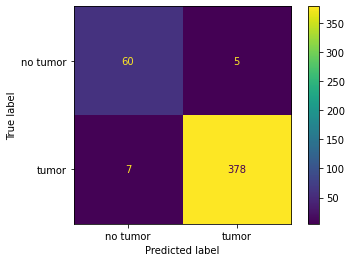

In [17]:
# Producing an accuracy score
print('The accuracy of the train set: ')
print(accuracy_score(ytrain2, y_pred_train2))
print('The accuracy of the validation set: ')
print(accuracy_score(yval2, y_pred_val2))

# Creating a classification report
print('The classification report: ')
print(classification_report(yval2, y_pred_val2, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat2 = confusion_matrix(yval2, y_pred_val2, labels=svc_classifier2.classes_)
cm_disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels=['no tumor', 'tumor'])
cm_disp2.plot()

# SVM with HOG and Principal Component Analysis (PCA)

In [18]:
# Scaling the numerical attributes to make sure all the features affect the variance in the same manner
# without getting affected by their individual scales
scaler1 = StandardScaler()
scaler1.fit(hog_features)
scaled_features = scaler1.transform(hog_features)

In [19]:
pca1 = PCA(.95)
pca1.fit(scaled_features)
scaled_features_pca = pca1.transform(scaled_features)

print('Number of Features: ')
print(pca1.n_components_)

Number of Features: 
1638


Text(0, 0.5, 'Cumulative Explained Variance')

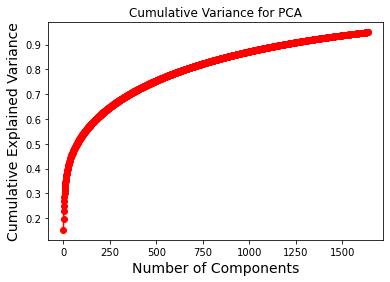

In [20]:
# Plotting the cumulative variance for PCA
plt.figure()
plt.title('Cumulative Variance for PCA')
plt.plot(np.cumsum(pca1.explained_variance_ratio_), 'o-', color="r",)
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)


In [21]:
# Splitting the dataset into training and validation set (85% training and 15% validation set)
xtrain3, xval3, ytrain3, yval3 = train_test_split(scaled_features_pca, y, train_size=0.85, random_state=15) 

## Implementing SVM Algorithm from the Scikit Library 

In [22]:
svc_classifier3 = SVC(kernel = 'linear')
# Alternatively since we are doing linear SVC, LinearSVC() function could also have been used

# Fitting our training data onto the classifier while also finding the runtime
start_time = time.time()
svc_classifier3.fit(xtrain3, ytrain3)
classifier3_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier3_time))

Training time is: 1.066175937652588 seconds


In [23]:
# Predicting the outputs using SVM
y_pred_val3 = svc_classifier3.predict(xval3)
y_pred_train3 = svc_classifier3.predict(xtrain3)

## Evaluating the Model Using the Validation Set

The accuracy of the train set: 
1.0
The accuracy of the validation set: 
0.9777777777777777
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.92      0.92      0.92        65
       tumor       0.99      0.99      0.99       385

    accuracy                           0.98       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.98      0.98      0.98       450

The confusion matrix: 


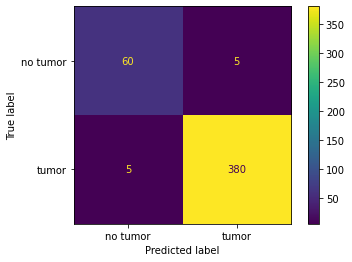

In [24]:
# Producing an accuracy score
print('The accuracy of the train set: ')
print(accuracy_score(ytrain3, y_pred_train3))
print('The accuracy of the validation set: ')
print(accuracy_score(yval3, y_pred_val3))

# Creating a classification report
print('The classification report: ')
print(classification_report(yval3, y_pred_val3, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat3 = confusion_matrix(yval3, y_pred_val3, labels=svc_classifier3.classes_)
cm_disp3 = ConfusionMatrixDisplay(confusion_matrix=conf_mat3, display_labels=['no tumor', 'tumor'])
cm_disp3.plot()

# SVM with HOG, PCA and Hyperparameter Tuning

In [25]:
# The training and validating data are the same as before hyperparameter tuning. Names are changed in order for
# this section to be more clear
xtrain4 = xtrain3
xval4 = xval3
ytrain4 = ytrain3
yval4 = yval3

## Implementing SVM Algorithm from the Scikit Library and Tuning  Hyperparameters

In [26]:
svc_classifier4 = SVC()

# Defining the parameter range
param_grid = {'C': [0.1, 1, 10,  100], 'gamma': [0.00001, 0.001, 0.01],'kernel': ('rbf', 'poly', 'sigmoid','linear')}

In [27]:
# Creating a GridSearchCV object 
grid = GridSearchCV(svc_classifier4, param_grid, refit=True, verbose=3)

# Fitting the GridSearchCV object to the training data
grid.fit(xtrain4, ytrain4)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.849 total time=   1.4s
[CV 2/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.2s
[CV 3/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.1s
[CV 4/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.2s
[CV 5/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.847 total time=   1.1s
[CV 1/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.849 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.8s
[CV 3/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.7s
[CV 4/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.7s
[CV 5/5] END ...C=0.1, gamma=1e-05, kernel=poly;, score=0.847 total time=   0.7s
[CV 1/5] END C=0.1, gamma=1e-05, kernel=sigmoid;, score=0.849 total time=   1.0s
[CV 2/5] END C=0.1, gamma=1e-05, kernel=sigmoid

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.2s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.902 total time=   3.3s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   3.2s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.941 total time=   2.6s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.927 total time=   2.6s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.947 total time=   2.6s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.959 total time=   2.4s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.949 total time=   2.5s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.784 total time=   0.7s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.751 total time=   0.7s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.808 total time=   0.7s
[CV 4/5] END ...C=1, gamma=0

[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.906 total time=   2.9s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.912 total time=   3.0s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.941 total time=   2.3s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.927 total time=   2.4s
[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.947 total time=   2.5s
[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.959 total time=   2.7s
[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.949 total time=   2.4s
[CV 1/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.808 total time=   0.6s
[CV 2/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.786 total time=   0.6s
[CV 3/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.798 total time=   0.6s
[CV 4/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.794 total time=   0.6s
[CV 5/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.792 total time=   0.7s
[CV 1/5] END .C=100, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1e-05, 0.001, 0.01],
                         'kernel': ('rbf', 'poly', 'sigmoid', 'linear')},
             verbose=3)

In [28]:
# Printing the best hyperparameters after tuning
print("Best hyperparameters are:", grid.best_params_)

# Printing how the model looks after hyperparameter tuning
print("Model after tuning is:", grid.best_estimator_)

Best hyperparameters are: {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
Model after tuning is: SVC(C=100, gamma=1e-05)


In [29]:
# Fitting our training data onto the classifier while also finding the runtime
start_time = time.time()
svc_classifier4.fit(xtrain4, ytrain4)
classifier4_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier4_time))

Training time is: 1.066175937652588 seconds


In [30]:
# Predicting the outputs using SVM
y_pred_val4 = svc_classifier4.predict(xval4)
y_pred_train4 = svc_classifier4.predict(xtrain4)

## Evaluating the Model Using the Validation Set

The accuracy of the train set: 
0.9992156862745099
The accuracy of the validation set: 
0.9755555555555555
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.97      0.86      0.91        65
       tumor       0.98      0.99      0.99       385

    accuracy                           0.98       450
   macro avg       0.97      0.93      0.95       450
weighted avg       0.98      0.98      0.97       450

The confusion matrix: 


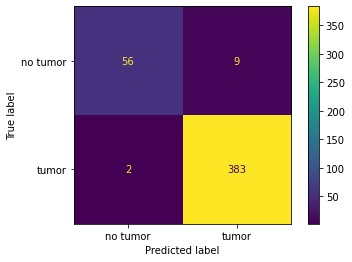

In [31]:
# Producing an accuracy score
print('The accuracy of the train set: ')
print(accuracy_score(ytrain4, y_pred_train4))
print('The accuracy of the validation set: ')
print(accuracy_score(yval4, y_pred_val4))

# Creating a classification report
print('The classification report: ')
print(classification_report(yval4, y_pred_val4, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat4 = confusion_matrix(yval4, y_pred_val4, labels=svc_classifier4.classes_)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix=conf_mat4, display_labels=['no tumor', 'tumor'])
cm_disp4.plot()

# Learning Curves

(0.0, 1.01)

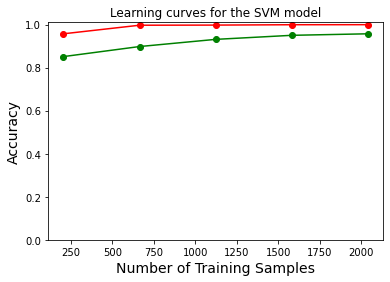

In [32]:
# The learning_curve() function is utilized in conjunction with 5-fold cross validation for getting
# the learning curve for SVM. The learning curve is then plotted.
train_sizes4, train_scores4, validation_scores4, fit_times4, _ = learning_curve(svc_classifier4, xtrain4, y_pred_train4, cv=5,return_times=True)
plt.figure()
plt.title('Learning curves for the SVM model')
plt.plot(train_sizes4, np.mean(train_scores4, axis=1), 'o-', color="r", label = 'Training error')
plt.plot(train_sizes4, np.mean(validation_scores4, axis=1), 'o-', color="g", label = 'Validation error')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylim((0,1.01))

# Testing the Model with the Test Data

## Getting the Testing Data

In [33]:
# Importing the data through the data_acquisition file
xdat2, ydat2 = da.labels_binary('./test')
x2 = np.array(xdat2)
y2 = np.array(ydat2)

# Normalizing the features
x2 = x2/255.

print(x2.shape)

(200, 512, 512, 1)


In [34]:
# Creating lists for storing the HOG feature vectors and HOG images for each image  
hog_features2 = []
hog_images2 = []

# Looping over the images and using hog() function from scikit-image library  
for datum in range(x2.shape[0]):
    fd, hog_image = hog(x[datum], orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
    hog_features2.append(fd)
    hog_images2.append(hog_image)

In [35]:
# Converting the HOG features into an array
hog_features2 = np.array(hog_features2)
hog_features2.shape

(200, 8192)

Text(0.5, 1.0, 'Image Before Using HOG')

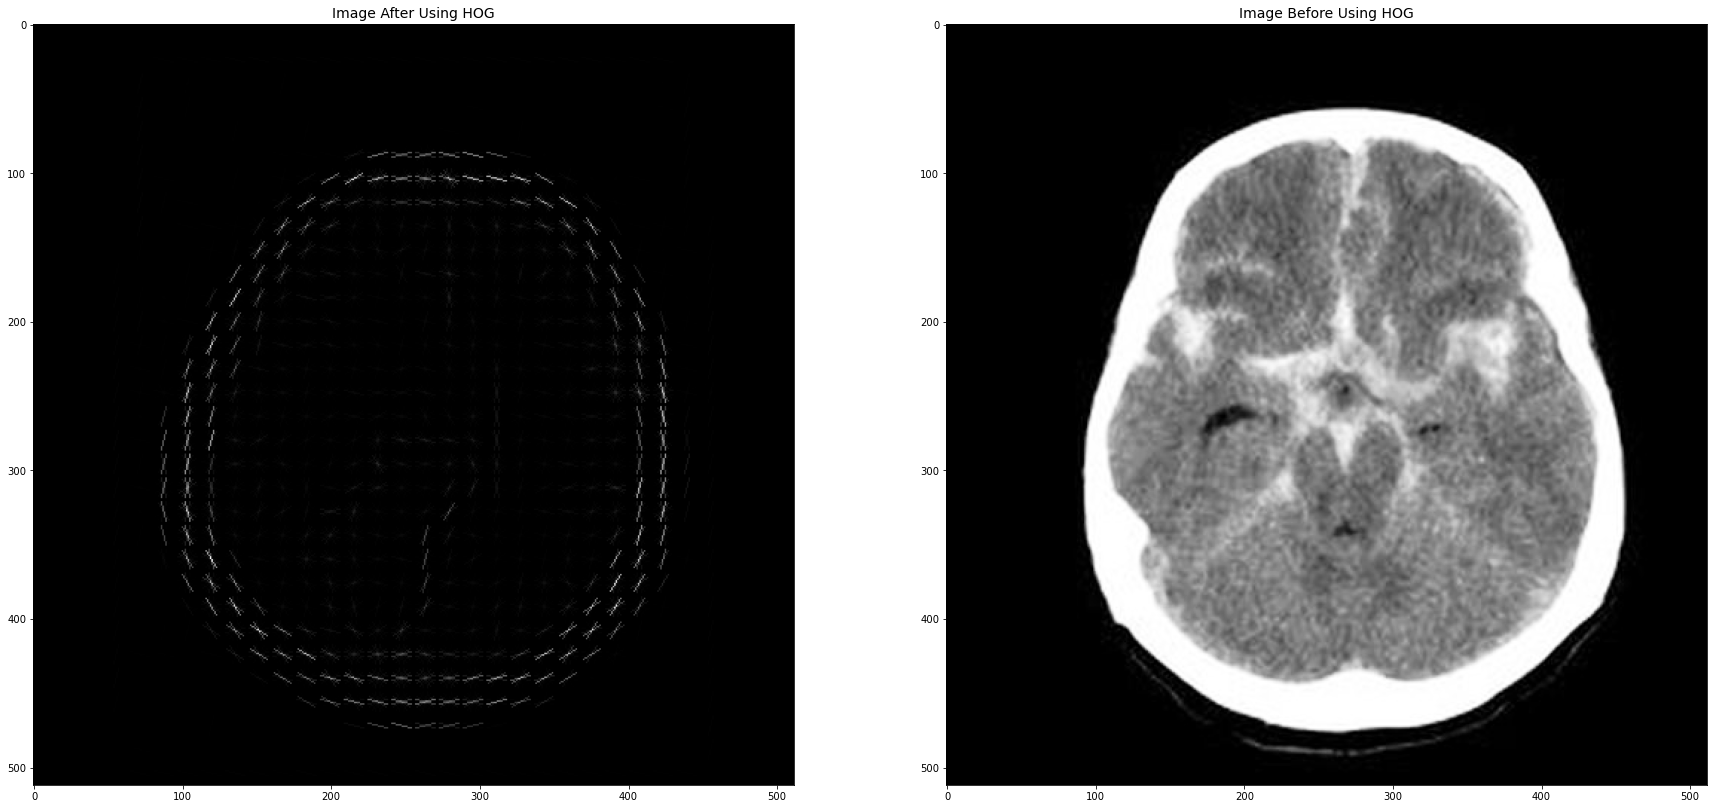

In [36]:
# Plotting the image[100] from the test set after using the hog() function and before using the hog() function 
fig2, ax2 = plt.subplots(1,2, figsize=(30,30))
ax2[0].imshow(hog_images2[100], cmap=plt.cm.gray)
ax2[0].set_title('Image After Using HOG', fontsize = 14)
ax2[1].imshow(x2[100].reshape(512,512), cmap='Greys_r')
ax2[1].set_title('Image Before Using HOG', fontsize = 14)


In [37]:
# Scaling the numerical attributes to have a mean of 0 and a standard deviation of 1 
scaler2 = StandardScaler()
scaler2.fit(hog_features2)
scaled_features2 = scaler2.transform(hog_features2)
scaled_features2.shape

(200, 8192)

In [38]:
#pca1 = PCA(random_state=10, n_components=1000)
#pca2 = PCA(n_components=1638)
#pca2.fit(scaled_features2)
scaled_features_pca2 = pca1.transform(scaled_features2)

print('Number of Features: ')
print(scaled_features_pca2.shape)

Number of Features: 
(200, 1638)


In [47]:
# Predicting the outputs using SVM
x2 = np.reshape(x2, (200, (512*512)))

y_pred_test5 = svc_classifier1.predict(x2)
y_pred_test6 = svc_classifier2.predict(hog_features2)
y_pred_test7 = svc_classifier3.predict(scaled_features_pca2)
y_pred_test8 = svc_classifier4.predict(scaled_features_pca2)

## Evaluating the Model Using the Test Set

Initial SVM
The accuracy of the test set: 
0.925
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.87      0.70      0.78        37
       tumor       0.94      0.98      0.95       163

    accuracy                           0.93       200
   macro avg       0.90      0.84      0.87       200
weighted avg       0.92      0.93      0.92       200

The confusion matrix: 
SVM+HOG
The accuracy of the test set: 
0.755
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.17      0.08      0.11        37
       tumor       0.81      0.91      0.86       163

    accuracy                           0.76       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.69      0.76      0.72       200

The confusion matrix: 
SV+HOG+PCA
The accuracy of the test set: 
0.755
The classification report: 
              precision    recall  f1-score   support

    no tumor       

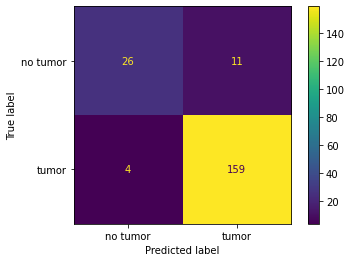

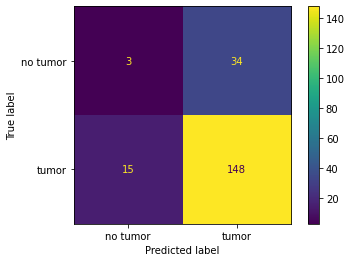

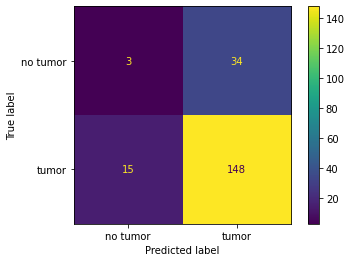

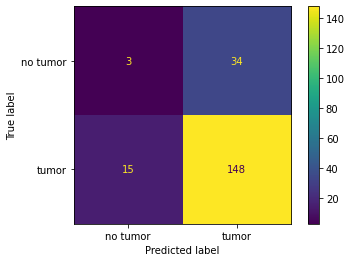

In [48]:
# Producing an accuracy score
print('Initial SVM')
print('The accuracy of the test set: ')
print(accuracy_score(y2, y_pred_test5))

# Creating a classification report
print('The classification report: ')
print(classification_report(y2, y_pred_test5, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat5 = confusion_matrix(y2, y_pred_test5, labels=svc_classifier1.classes_)
cm_disp5 = ConfusionMatrixDisplay(confusion_matrix=conf_mat5, display_labels=['no tumor', 'tumor'])
cm_disp5.plot()

print('SVM+HOG')
print('The accuracy of the test set: ')
print(accuracy_score(y2, y_pred_test6))

# Creating a classification report
print('The classification report: ')
print(classification_report(y2, y_pred_test6, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat6 = confusion_matrix(y2, y_pred_test6, labels=svc_classifier2.classes_)
cm_disp6 = ConfusionMatrixDisplay(confusion_matrix=conf_mat6, display_labels=['no tumor', 'tumor'])
cm_disp6.plot()

print('SV+HOG+PCA')
print('The accuracy of the test set: ')
print(accuracy_score(y2, y_pred_test7))

# Creating a classification report
print('The classification report: ')
print(classification_report(y2, y_pred_test7, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat7 = confusion_matrix(y2, y_pred_test7, labels=svc_classifier3.classes_)
cm_disp7 = ConfusionMatrixDisplay(confusion_matrix=conf_mat7, display_labels=['no tumor', 'tumor'])
cm_disp7.plot()

print('Final SVM')
print('The accuracy of the test set: ')
print(accuracy_score(y2, y_pred_test8))

# Creating a classification report
print('The classification report: ')
print(classification_report(y2, y_pred_test8, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat8 = confusion_matrix(y2, y_pred_test8, labels=svc_classifier4.classes_)
cm_disp8 = ConfusionMatrixDisplay(confusion_matrix=conf_mat8, display_labels=['no tumor', 'tumor'])
cm_disp8.plot()